# SHAP 101 - explaining ml models and beyond

### Feature Attributions
* SHAP (SHapley Additive exPlanations) - https://shap.readthedocs.io/en/latest/
* Understand individual predictions - https://www.kaggle.com/code/dansbecker/shap-values/tutorial
* Aggregate SHAP values for even more detailed model insights - https://www.kaggle.com/code/dansbecker/advanced-uses-of-shap-values/tutorial

* Convert SHAP Score to percentage: https://medium.com/towards-data-science/* black-box-models-are-actually-more-explainable-than-a-logistic-regression-f263c22795d

### Partial Dependence Plot
* Partial Dependence Plot Theory - https://christophm.github.io/interpretable-ml-book/pdp.html
* Partial Dependence Plots - https://scikit-learn.org/stable/modules/partial_dependence.html

### Additional References
* Fairlearn - https://fairlearn.org
* squaredev.io - https://github.com/squaredev-io/explainable-ai
* Rerun-sdk - https://pypi.org/project/rerun-sdk/

# Kaggle Titanic Compitition
https://www.kaggle.com/competitions/titanic

### Data Description
https://www.kaggle.com/competitions/titanic/data?select=train.csv

| Variable | Definition	| Key | 
| :--- | :--- | :--- |
| survival | Survival |	0 = No, 1 = Yes |
| pclass   | Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Sex	| |
| Age |	Age | in years | 	
| sibsp	| # of siblings / spouses aboard the Titanic |	
| parch	| # of parents / children aboard the Titanic |	
| ticket |	Ticket number | |	
| fare | Passenger fare | (Y.W.: Ticket price paid)  |	
| cabin	| Cabin number | |	
| embarked	| Port of Embarkation |	C = Cherbourg, Q = Queenstown, S = Southampton |

### Variable Notes

**pclass:** A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [29]:
from utils.util import KaggleData, current_dir_subpath
import pandas as pd
titanic_train_path = current_dir_subpath("data/train.csv")
titanic_test_path = current_dir_subpath("data/test.csv")

titanic = KaggleData(
     train_path = titanic_train_path,
     test_path = titanic_test_path,
     label_col="Survived"
)

train_X_df, test_X_df, train_y = titanic.load()
data_X_df = titanic.load_all()

## Explore numerical features in different data sets

In [30]:
num_features = data_X_df.describe().columns.to_list()
print(num_features)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


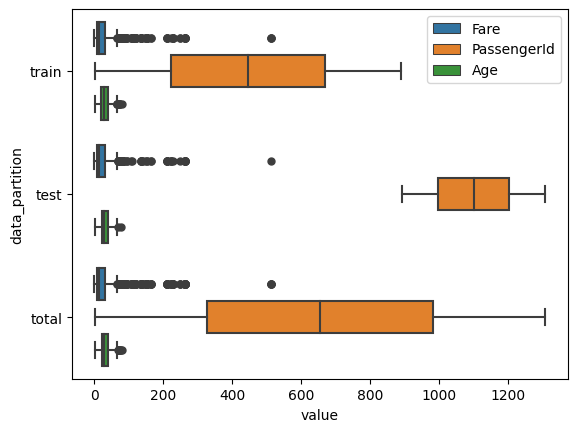

In [31]:
titanic.boxplot_dist(["PassengerId", "Fare", "Age"], marker="o", orient="h", legend="upper right")

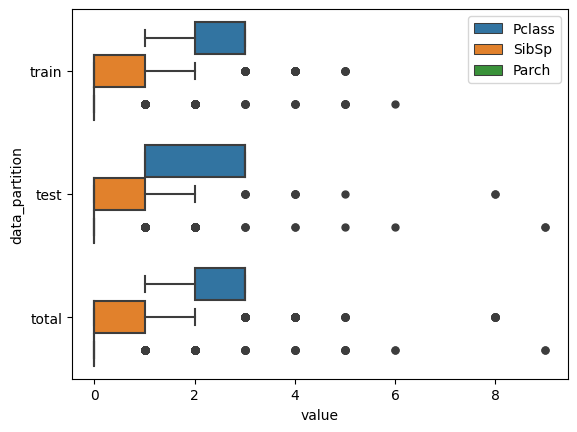

In [32]:
titanic.boxplot_dist(['Pclass', 'SibSp', 'Parch'], marker="o", orient="h", legend="upper right")

In [33]:
data_X_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
data_X_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
# correlation
data_X_df.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428
Pclass,-0.038354,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000


In [36]:
train_df = pd.concat([train_X_df, train_y], axis=1)
train_df.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.005007
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.338481
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.077221
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.035322
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,0.081629
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,0.257307
Survived,-0.005007,-0.338481,-0.077221,-0.035322,0.081629,0.257307,1.000000
